# Analyzing Student Stress Factors through Machine Learning Techniques

by Manas Sharma


### Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
slf_df = pd.read_csv('./data/StressLevelDataset.csv')
slf_df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


# First glance at the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

<Axes: xlabel='stress_level'>

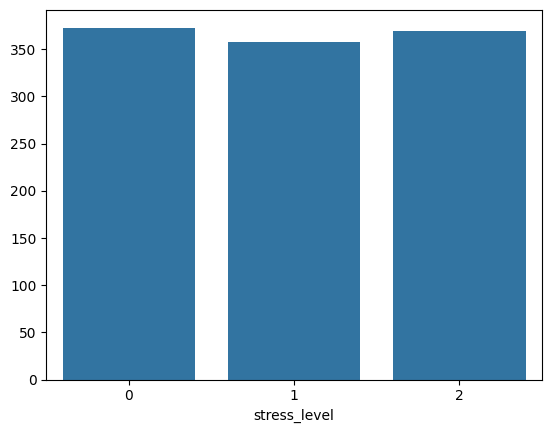

In [5]:
slf_df.info()
sns.barplot(x=slf_df["stress_level"].value_counts().index, y=slf_df["stress_level"].value_counts().values)
#sns.barplot(x=slf_df["bullying"].value_counts().index, y =slf_df["bullying"].value_counts().values)

In [4]:
slf_df.describe().round(2)

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.00,1100.00,1100.00,1100.00,1100.00,1100.00,1100.00,1100.00,1100.00,1100.00,...,1100.00,1100.00,1100.00,1100.00,1100.00,1100.00,1100.00,1100.00,1100.00,1100.00
mean,11.06,17.78,0.49,12.56,2.51,2.18,2.66,2.75,2.65,2.52,...,2.77,2.77,2.62,2.65,2.65,1.88,2.73,2.77,2.62,1.00
std,6.12,8.94,0.50,7.73,1.41,0.83,1.55,1.40,1.33,1.12,...,1.43,1.41,1.32,1.38,1.53,1.05,1.43,1.42,1.53,0.82
min,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,6.00,11.00,0.00,6.00,1.00,1.00,1.00,2.00,2.00,2.00,...,2.00,2.00,2.00,2.00,1.00,1.00,2.00,2.00,1.00,0.00
50%,11.00,19.00,0.00,12.00,3.00,2.00,2.50,3.00,3.00,2.00,...,3.00,2.00,2.00,2.00,2.00,2.00,2.00,2.50,3.00,1.00
75%,16.00,26.00,1.00,19.00,3.00,3.00,4.00,4.00,3.00,3.00,...,4.00,4.00,3.00,4.00,4.00,3.00,4.00,4.00,4.00,2.00
max,21.00,30.00,1.00,27.00,5.00,3.00,5.00,5.00,5.00,5.00,...,5.00,5.00,5.00,5.00,5.00,3.00,5.00,5.00,5.00,2.00


In [5]:
# check for na values
slf_df.isna().sum()

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

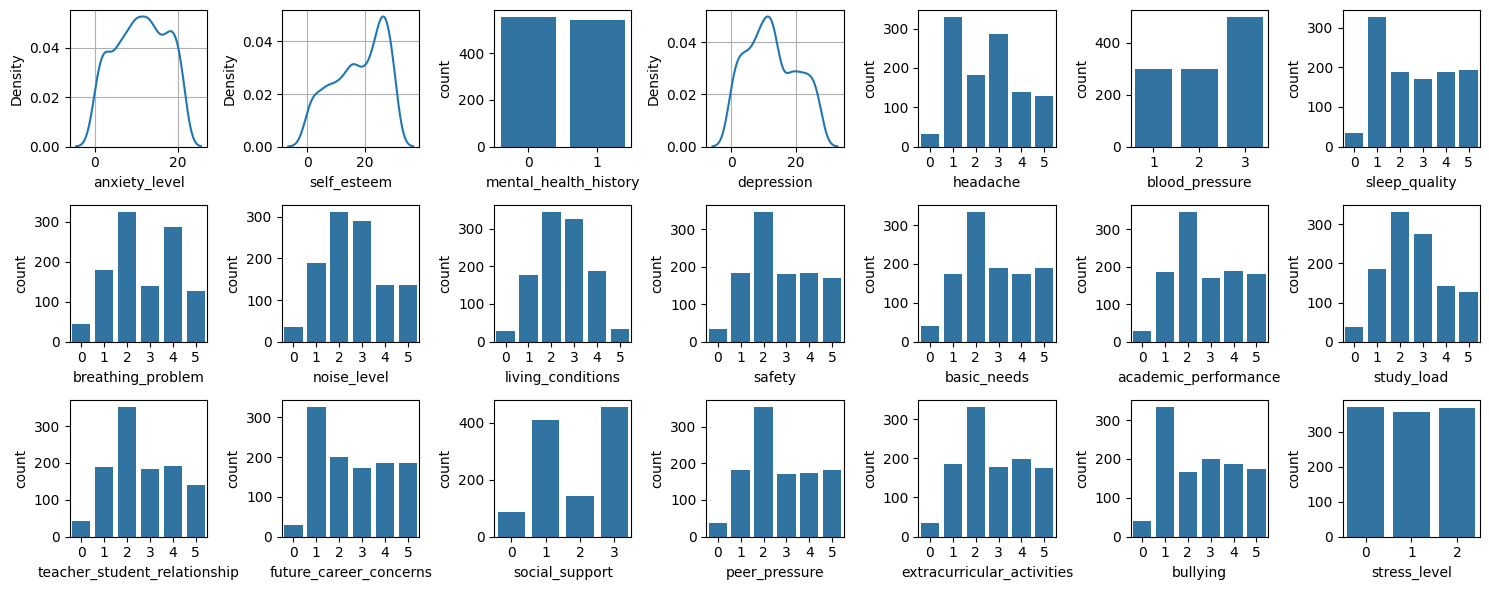

In [6]:
plt.rcParams['figure.figsize']=[15,6]
r=3
c=7
it=1
for i in slf_df.columns:
    plt.subplot(r,c,it)
    if slf_df[i].nunique()>6:
        sns.kdeplot(slf_df[i])
        plt.grid()
    else:
        sns.countplot(x=slf_df[i])
    it+=1
plt.tight_layout()
plt.show()

## Note:
No missing values or duplicate values, thus Preprocessing is not necessary for this dataset.

# Statistical analysis of features

#### Differences in anxiety levels based on academic performance

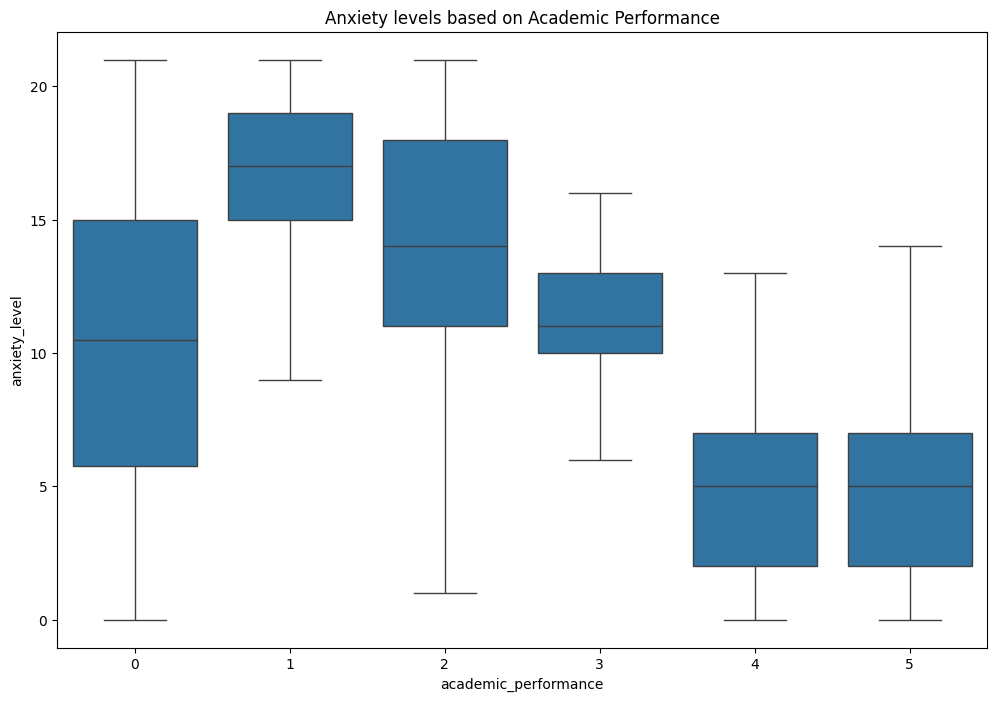

In [7]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='academic_performance', y='anxiety_level', data=slf_df, showfliers=False)
plt.title('Anxiety levels based on Academic Performance')
plt.show()

#### What is the average study load reported by students?

In [8]:
print("The average study load reported by the students is ", round(slf_df["study_load"].mean(),2)," on a range of 0-5.", sep = "")

The average study load reported by the students is 2.62 on a range of 0-5.


#### What percentage of students have experienced bullying?

In [9]:
bullying_scale = slf_df['bullying'].unique()
print(f'Bullying experienced scale: {np.sort(bullying_scale)}')

# Any amount of bullying is included in the results
bullied_students = len(slf_df[slf_df['bullying']>0])

print(f'Number of bullied students: {round((bullied_students/slf_df.shape[0])*100, 2)}%')

Bullying experienced scale: [0 1 2 3 4 5]
Number of bullied students: 96.45%


## Create correlation matrix and heatmap

#### Which factors contribute most significantly to predicting stress levels in students?

stress_level                    1.000000
self_esteem                     0.756195
bullying                        0.751162
sleep_quality                   0.749068
future_career_concerns          0.742619
anxiety_level                   0.736795
depression                      0.734379
academic_performance            0.720922
headache                        0.713484
safety                          0.709602
basic_needs                     0.708968
extracurricular_activities      0.692977
peer_pressure                   0.690684
teacher_student_relationship    0.680163
noise_level                     0.663371
mental_health_history           0.648644
study_load                      0.634156
social_support                  0.632497
living_conditions               0.581723
breathing_problem               0.573984
blood_pressure                  0.394200
Name: stress_level, dtype: float64


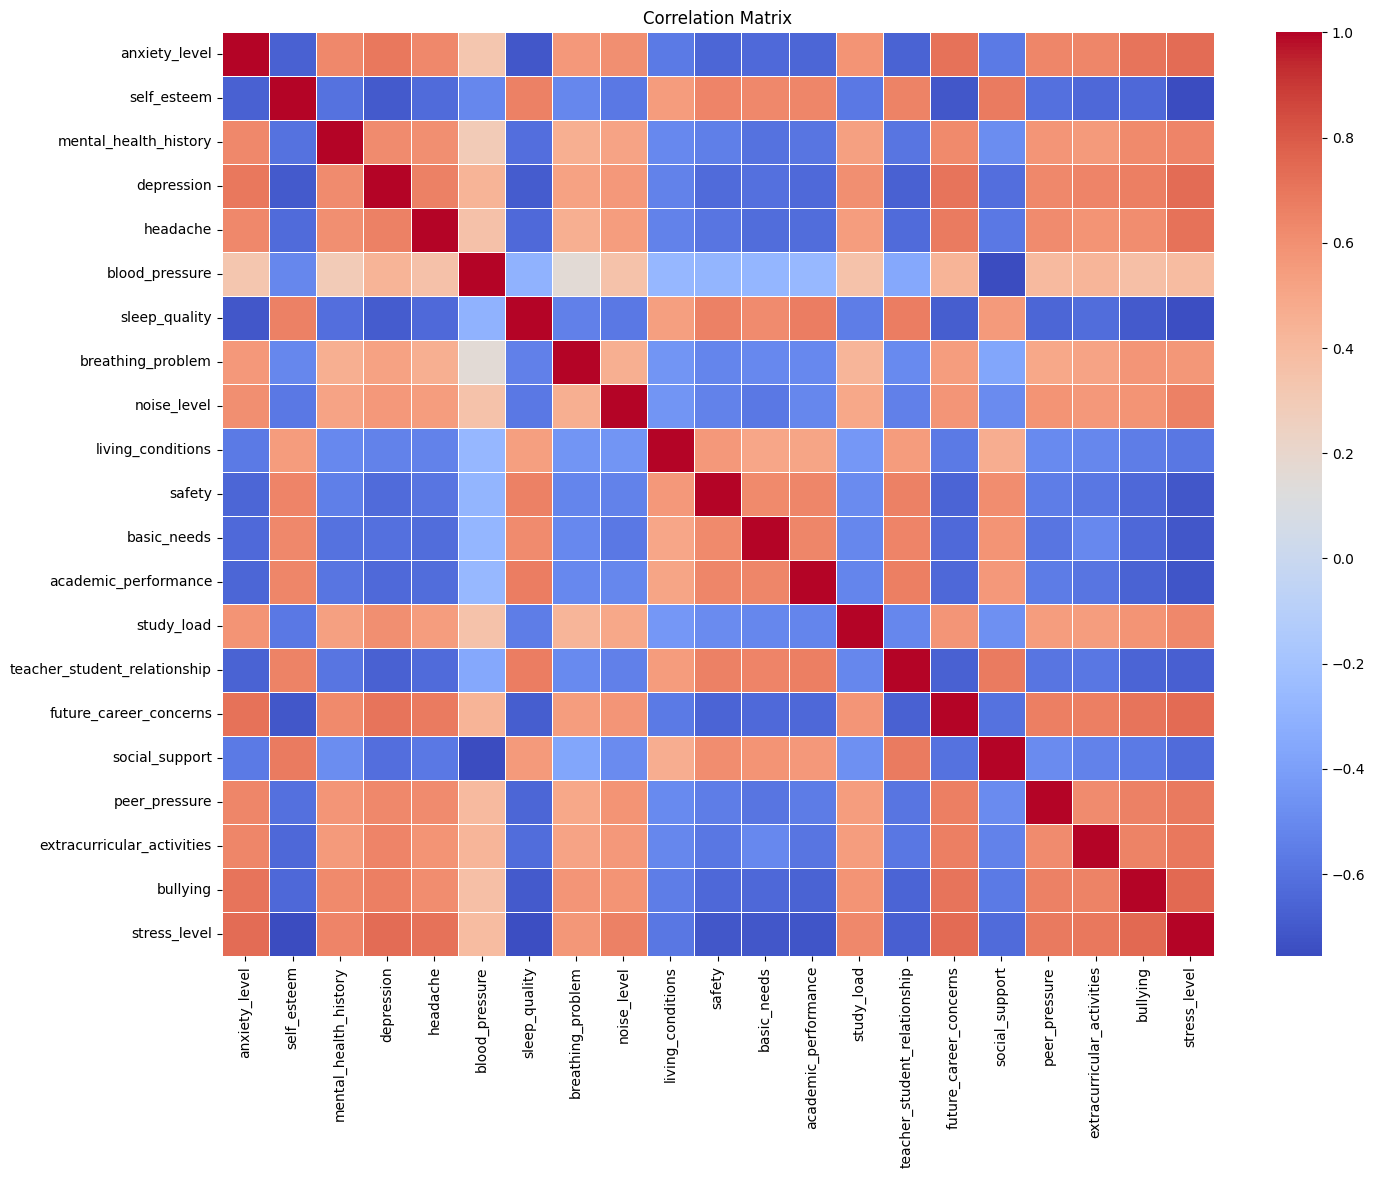

In [10]:
corr = slf_df.corr()

# print correlation for stress_level
print(np.abs(corr['stress_level']).sort_values(ascending=False))

# plot correlation matrix
plt.figure(figsize=(16,12))
sns.heatmap(corr, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [11]:
highest_corr = np.abs(corr['stress_level'].drop('stress_level')).idxmax()
lowest_corr = np.abs(corr['stress_level']).idxmin()
print(f"Highest correlated variable with stress_level: {highest_corr}")
print(f"Lowest correlated variable with stress_level: {lowest_corr}")

Highest correlated variable with stress_level: self_esteem
Lowest correlated variable with stress_level: blood_pressure


> Self esteem, bullying and sleep quality appear to be the most impactful factors for predicting stress levels in students

# Explore ML models

In [12]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import resample

### KNN With 3 Neighbors

Trying out KNN before tuning the hyperparameters. We want to see how this will compare once the hyperparameters are tuned. To start, we are using 3 neighbors. 

0.9181818181818182


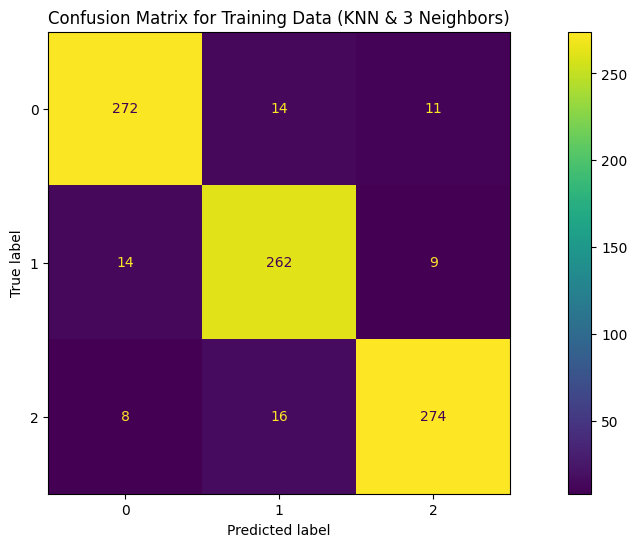

0.8727272727272727


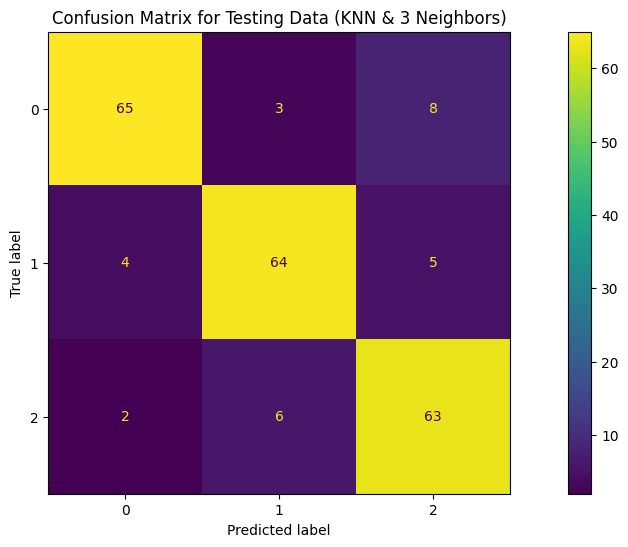

In [13]:
X = np.array(slf_df.drop(columns=['stress_level']))
y = np.array(slf_df['stress_level'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_train)
print(accuracy_score(y_train, y_predict))

training_cm = confusion_matrix(y_train, y_predict, labels=clf.classes_)
ConfusionMatrixDisplay(training_cm, display_labels=clf.classes_).plot()
plt.title("Confusion Matrix for Training Data (KNN & 3 Neighbors)")
plt.show()

y_predict = clf.predict(X_test)
print(accuracy_score(y_test, y_predict))

testing_cm = confusion_matrix(y_test, y_predict, labels=clf.classes_)
ConfusionMatrixDisplay(testing_cm, display_labels=clf.classes_).plot()
plt.title("Confusion Matrix for Testing Data (KNN & 3 Neighbors)")
plt.show()

### KNN with K-Fold Cross Validation
- Using 10 splits
- Looping from 1 to 30 for the number of neighbors
- Plot confusion matrix for both training and testing 

In [14]:
X = np.array(slf_df.drop(columns=['stress_level']))
y = np.array(slf_df['stress_level'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, train_size=0.8)
splits = KFold(n_splits=10)

for k in range(1, 30, 2):
    scores = []
    for train_index, val_index in splits.split(X_train):
        X_sub_train = X_train[train_index]
        X_val = X_train[val_index]
        y_sub_train = y_train[train_index]
        y_val = y_train[val_index]
            
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(X_sub_train, y_sub_train)
        y_predict = clf.predict(X_val)
        scores.append(accuracy_score(y_val, y_predict))
    print("Neightbors: ", k, "Score: ", np.mean(scores))

Neightbors:  1 Score:  0.875
Neightbors:  3 Score:  0.875
Neightbors:  5 Score:  0.8670454545454545
Neightbors:  7 Score:  0.8681818181818184
Neightbors:  9 Score:  0.8693181818181819
Neightbors:  11 Score:  0.8727272727272727
Neightbors:  13 Score:  0.8715909090909092
Neightbors:  15 Score:  0.875
Neightbors:  17 Score:  0.8715909090909092
Neightbors:  19 Score:  0.8738636363636363
Neightbors:  21 Score:  0.8715909090909092
Neightbors:  23 Score:  0.8738636363636363
Neightbors:  25 Score:  0.8738636363636363
Neightbors:  27 Score:  0.8761363636363635
Neightbors:  29 Score:  0.875


0.8772727272727273


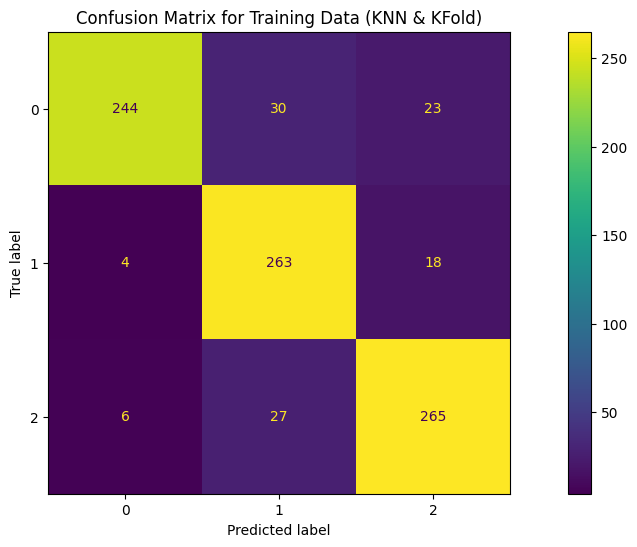

0.8909090909090909


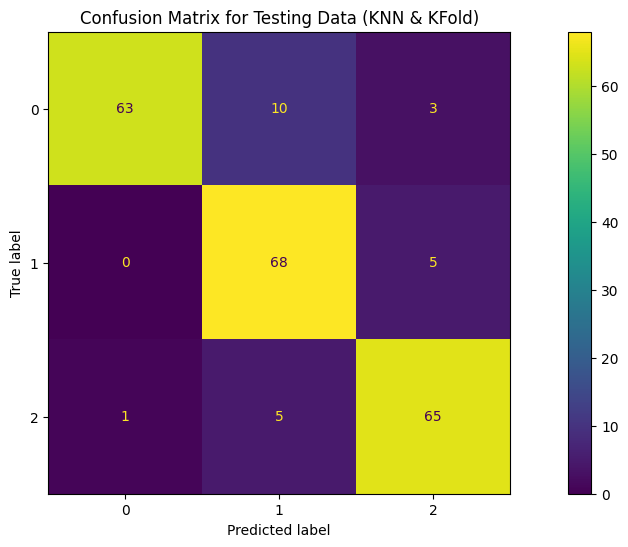

In [15]:

clf = KNeighborsClassifier(n_neighbors=27)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_train)
print(accuracy_score(y_train, y_predict))

training_cm = confusion_matrix(y_train, y_predict, labels=clf.classes_)
ConfusionMatrixDisplay(training_cm, display_labels=clf.classes_).plot()
plt.title("Confusion Matrix for Training Data (KNN & KFold)")
plt.show()

y_predict = clf.predict(X_test)
print(accuracy_score(y_test, y_predict))

testing_cm = confusion_matrix(y_test, y_predict, labels=clf.classes_)
ConfusionMatrixDisplay(testing_cm, display_labels=clf.classes_).plot()
plt.title("Confusion Matrix for Testing Data (KNN & KFold)")
plt.show()

### Undersampling Stress Levels 0 and 2 to match Stress Level 1
We want to determine if undersampling will help improve the performance of the model. We will be undersampling stress levels 0 and 2 to match the number of stress level 1. We will also still be applying KFold cross validation to the model. 

In [16]:
under_sample_stress_0 = resample(slf_df[slf_df['stress_level']==0], replace=False, n_samples=358, random_state=42)
under_sample_stress_2 = resample(slf_df[slf_df['stress_level']==2], replace=False, n_samples=358, random_state=42)

slf_df_balanced = pd.concat([under_sample_stress_0, slf_df[slf_df['stress_level']==1], under_sample_stress_2,])

X = np.array(slf_df_balanced.drop(['stress_level'], axis=1))
y = np.array(slf_df_balanced['stress_level'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, train_size=0.8)

# KFold Cross validation
splits = KFold(n_splits=10)

for k in range(1, 30, 2):
    scores = []
    for train_index, val_index in splits.split(X_train):
        X_sub_train = X_train[train_index]
        X_val = X_train[val_index]
        y_sub_train = y_train[train_index]
        y_val = y_train[val_index]
            
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(X_sub_train, y_sub_train)
        y_predict = clf.predict(X_val)
        scores.append(accuracy_score(y_val, y_predict))
    print("Neightbors: ", k, "Score: ", np.mean(scores))

Neightbors:  1 Score:  0.8859507523939808
Neightbors:  3 Score:  0.8777975376196989
Neightbors:  5 Score:  0.871969904240766
Neightbors:  7 Score:  0.8777701778385772
Neightbors:  9 Score:  0.8812859097127224
Neightbors:  11 Score:  0.8789329685362517
Neightbors:  13 Score:  0.8824487004103967
Neightbors:  15 Score:  0.8801231190150478
Neightbors:  17 Score:  0.8812722298221614
Neightbors:  19 Score:  0.8824487004103967
Neightbors:  21 Score:  0.8812859097127224
Neightbors:  23 Score:  0.8824487004103967
Neightbors:  25 Score:  0.8836251709986319
Neightbors:  27 Score:  0.8836251709986319
Neightbors:  29 Score:  0.8847879616963065


We found that using only one singular neighbor had the best performance overall. This could be due to overfitting though.

1.0


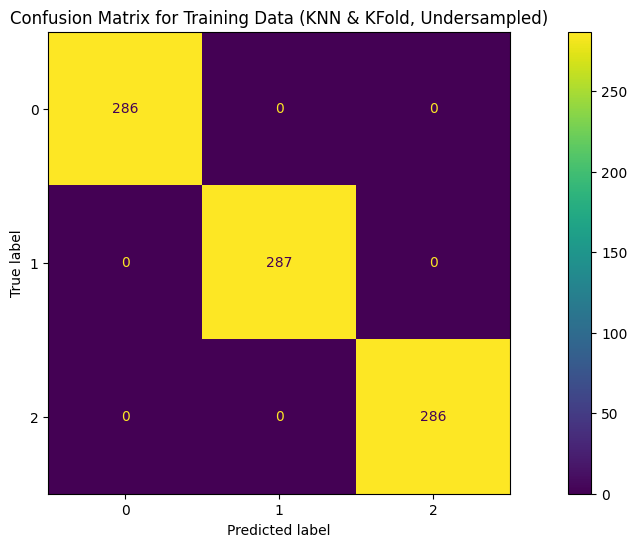

0.8697674418604651


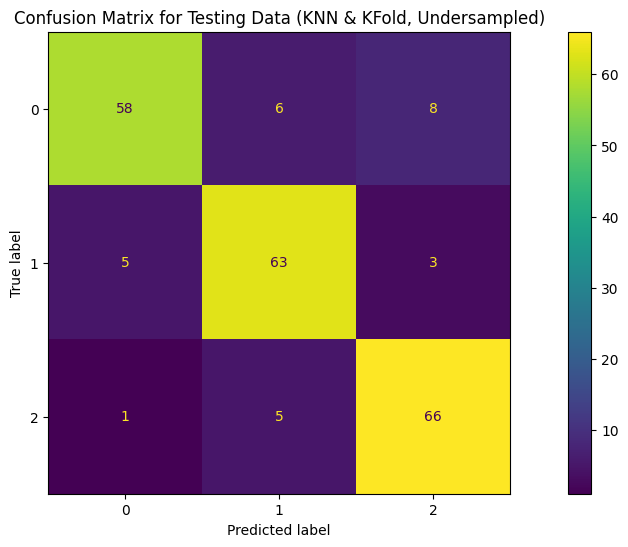

In [17]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_train)
print(accuracy_score(y_train, y_predict))

training_cm = confusion_matrix(y_train, y_predict, labels=clf.classes_)
ConfusionMatrixDisplay(training_cm, display_labels=clf.classes_).plot()
plt.title("Confusion Matrix for Training Data (KNN & KFold, Undersampled)")
plt.show()

y_predict = clf.predict(X_test)
print(accuracy_score(y_test, y_predict))

testing_cm = confusion_matrix(y_test, y_predict, labels=clf.classes_)
ConfusionMatrixDisplay(testing_cm, display_labels=clf.classes_).plot()
plt.title("Confusion Matrix for Testing Data (KNN & KFold, Undersampled)")
plt.show()

### MLP without KFold Cross Validation
Here, we are going to try MLP with a initial learning rate of 0.0001 and 50 hidden layers to get a baseline for performance. We will then tune the hyperparameters to see if we can improve the performance of the model.

Training Accuracy:  0.8818181818181818
Testing Accuracy:  0.8818181818181818
[[262   8  27]
 [ 16 246  23]
 [ 22   8 268]]


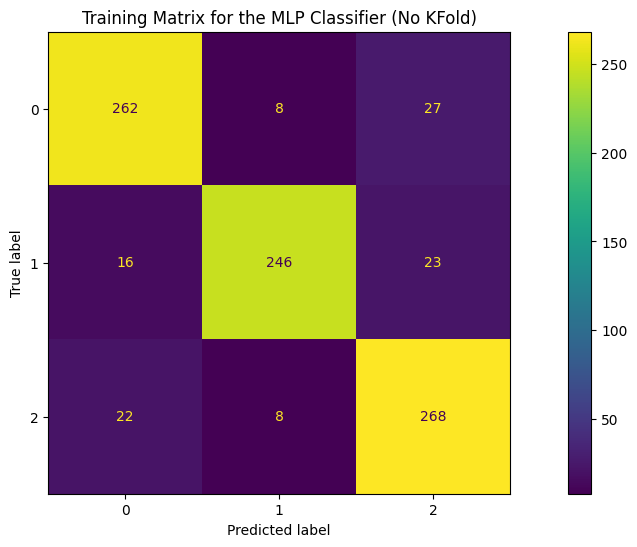

[[67  4  5]
 [ 6 62  5]
 [ 5  1 65]]


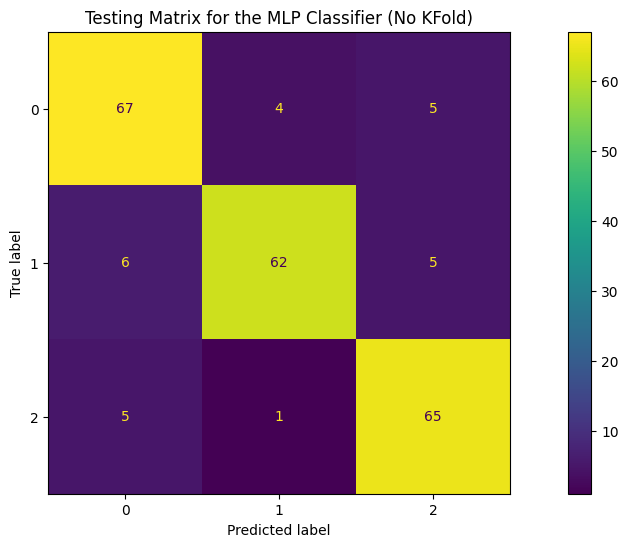

In [18]:

X = np.array(slf_df.drop(columns=['stress_level']))
y = np.array(slf_df['stress_level'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

pre_processed_X_train = scaler.transform(X_train)
pre_processed_X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(50), learning_rate_init=0.0001, max_iter=1000, activation='tanh', solver='sgd', random_state=42)


mlp.fit(pre_processed_X_train, y_train)
y_pred_train = mlp.predict(pre_processed_X_train)
training_acc_score = accuracy_score(y_train, y_pred_train)
print("Training Accuracy: ", training_acc_score)

y_pred_test = mlp.predict(pre_processed_X_test)
testing_acc_score = accuracy_score(y_test, y_pred_test)
print("Testing Accuracy: ", testing_acc_score)


training_cm = confusion_matrix(y_train, y_pred_train, labels=mlp.classes_)
print(training_cm)
display_training_cm = ConfusionMatrixDisplay(confusion_matrix=training_cm, display_labels=mlp.classes_)
display_training_cm.plot()
plt.title("Training Matrix for the MLP Classifier (No KFold)")
plt.show()

testing_cm = confusion_matrix(y_test, y_pred_test, labels=mlp.classes_)
print(testing_cm)
display_testing_cm = ConfusionMatrixDisplay(confusion_matrix=testing_cm, display_labels=mlp.classes_)
display_testing_cm.plot()
plt.title("Testing Matrix for the MLP Classifier (No KFold)")
plt.show()

### MLP with KFold Cross Validation
Here, we are going to try MLP with KFold Cross Validation to tune the hyperparameters and attempt to improve the performance of the model.
- First, we are going to find the best initial learning rate
- Next, we will find the best network structure (hidden_layers)

{(50, 0.0001): 0.8715493023147826,
 (50, 0.001): 0.8772375844535766,
 (50, 0.01): 0.8886064095717924,
 (50, 0.1): 0.887476492303406,
 (50, 1): 0.8897518051589236,
 (100, 0.0001): 0.8738478326484177,
 (100, 0.001): 0.8772375844535767,
 (100, 0.01): 0.8863272271365884,
 (100, 0.1): 0.8863310967162746,
 (100, 1): 0.8829219970126845,
 (200, 0.0001): 0.8749816194964902,
 (200, 0.001): 0.8749545324386866,
 (200, 0.01): 0.8897401964198649,
 (200, 0.1): 0.8920193788550689,
 (200, 1): 0.8727140458003451,
 (500, 0.0001): 0.8783868496203943,
 (500, 0.001): 0.8851934402885159,
 (500, 0.01): 0.8942908221309,
 (500, 0.1): 0.8886141487311647,
 (500, 1): 0.8761154063445629}

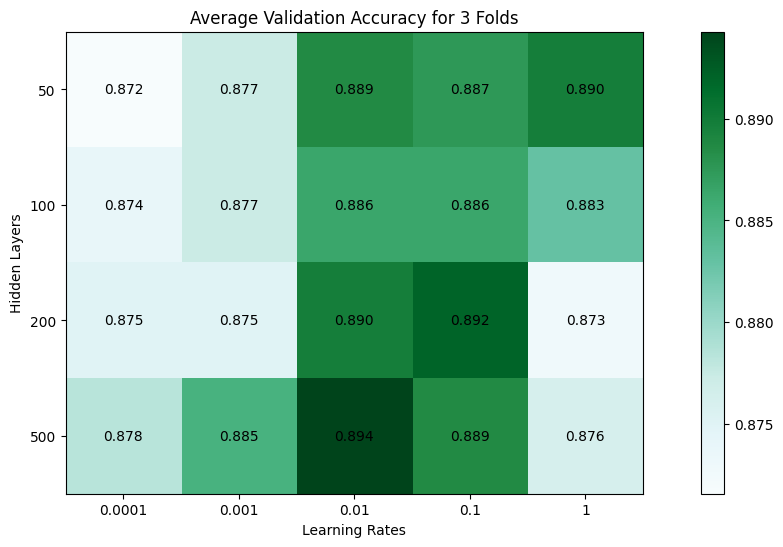

In [19]:
def cross_validation_mlp(pre_processed_X_train, y_train, hidden_layer_vals, learning_rate_vals):
    folds = KFold(n_splits=3)
    cross_val_scores = {}
    
    for i in hidden_layer_vals:
        for j in learning_rate_vals:
            acc_scores = []
            
            for train_index, val_index in folds.split(pre_processed_X_train):
                X_sub, X_val = pre_processed_X_train[train_index], pre_processed_X_train[val_index]
                y_sub, y_val = y_train[train_index], y_train[val_index]
                
                mlp = MLPClassifier(hidden_layer_sizes=(i), learning_rate_init=j, activation='tanh', solver='sgd', random_state=42)
                mlp.fit(X_sub, y_sub)
                y_predict = mlp.predict(X_val)
                
                acc_scores.append(accuracy_score(y_val, y_predict))
        
            cross_val_scores[i,j] = np.mean(acc_scores)
    
    return cross_val_scores


def heatmap(cross_val_scores, hidden_layer_vals, learning_rate_vals):
    cross_vals_data = list(cross_val_scores.values())
    cross_vals_data = np.array(cross_vals_data)
    cross_vals_data = cross_vals_data.reshape(len(hidden_layer_vals), len(learning_rate_vals))
    
    heatmap = plt.imshow(cross_vals_data, cmap="BuGn")
    
    plt.colorbar(heatmap)
    plt.title("Average Validation Accuracy for 3 Folds")
    plt.xlabel("Learning Rates")
    plt.ylabel("Hidden Layers")
    plt.xticks(np.arange(len(learning_rate_vals)), learning_rate_vals)
    plt.yticks(np.arange(len(hidden_layer_vals)), hidden_layer_vals)
    
    for i in range(len(hidden_layer_vals)):
        for j in range(len(learning_rate_vals)):
            plt.text(j, i, f"{cross_vals_data[i][j]:.3f}", ha='center', va='center', color='black', fontsize=10)
    
    plt.plot()
    
    return None


hidden_layer_vals = [50, 100, 200, 500]
learning_rate_vals = [0.0001, 0.001, 0.01, 0.1, 1]

cross_val_scores = cross_validation_mlp(pre_processed_X_train, y_train, hidden_layer_vals, learning_rate_vals)
display(cross_val_scores)
heatmap(cross_val_scores, hidden_layer_vals, learning_rate_vals)

In [20]:
def cross_validation_mlp_2(pre_processed_X_train, y_train, hidden_layer_vals):
    folds = KFold(n_splits=3)
    cross_val_scores = {}
    
    # For each hidden_layer structure & each fold, create an MLP classifier and fit the sub training data.
    # Calculate the validation accuracy for each fold then store the mean across the folds.
    for i in hidden_layer_vals:
        acc_scores = []
        for train_index, val_index in folds.split(pre_processed_X_train):
            X_sub, X_val = pre_processed_X_train[train_index], pre_processed_X_train[val_index]
            y_sub, y_val = y_train[train_index], y_train[val_index]
                
            mlp = MLPClassifier(hidden_layer_sizes=(i[:]), learning_rate_init=0.01, activation='tanh', solver='sgd', random_state=42)
            mlp.fit(X_sub, y_sub)
            y_predict = mlp.predict(X_val)
                
            acc_scores.append(accuracy_score(y_val, y_predict))
        
        cross_val_scores[str(i)] = np.mean(acc_scores)
    
    return cross_val_scores


hidden_layer_vals = [[100], [100, 100], [100, 100, 100], [200], [200, 100], [200, 100, 100], [500], [500, 200], [500, 200, 100]]
cross_val_scores = cross_validation_mlp_2(pre_processed_X_train, y_train, hidden_layer_vals)
display(cross_val_scores)

{'[100]': 0.8863272271365884,
 '[100, 100]': 0.8874571444049747,
 '[100, 100, 100]': 0.8886141487311647,
 '[200]': 0.8897401964198649,
 '[200, 100]': 0.8874803618830923,
 '[200, 100, 100]': 0.8885986704124198,
 '[500]': 0.8942908221309,
 '[500, 200]': 0.8908894615866826,
 '[500, 200, 100]': 0.8897518051589236}

Training Accuracy:  1.0
Testing Accuracy:  0.8818181818181818
[[297   0   0]
 [  0 285   0]
 [  0   0 298]]


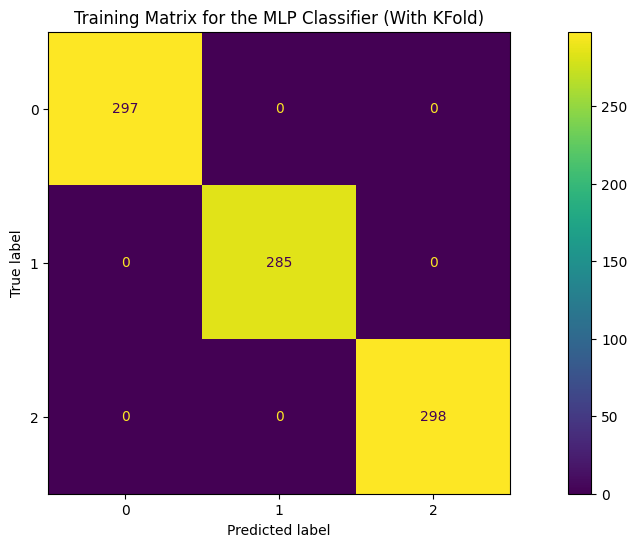

[[65  7  4]
 [ 4 66  3]
 [ 4  4 63]]


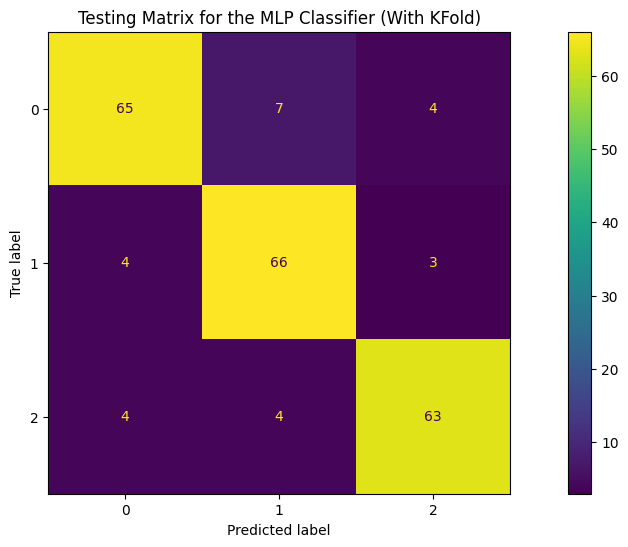

In [21]:
# Found 500 and 0.01 to be the best hyperparameters
mlp = MLPClassifier(hidden_layer_sizes=(500), learning_rate_init=0.01, max_iter=1000, activation='tanh', solver='sgd', random_state=42)

mlp.fit(pre_processed_X_train, y_train)
y_pred_train = mlp.predict(pre_processed_X_train)
training_acc_score = accuracy_score(y_train, y_pred_train)
print("Training Accuracy: ", training_acc_score)

y_pred_test = mlp.predict(pre_processed_X_test)
testing_acc_score = accuracy_score(y_test, y_pred_test)
print("Testing Accuracy: ", testing_acc_score)


training_cm = confusion_matrix(y_train, y_pred_train, labels=mlp.classes_)
print(training_cm)
display_training_cm = ConfusionMatrixDisplay(confusion_matrix=training_cm, display_labels=mlp.classes_)
display_training_cm.plot()
plt.title("Training Matrix for the MLP Classifier (With KFold)")
plt.show()

testing_cm = confusion_matrix(y_test, y_pred_test, labels=mlp.classes_)
print(testing_cm)
display_testing_cm = ConfusionMatrixDisplay(confusion_matrix=testing_cm, display_labels=mlp.classes_)
display_testing_cm.plot()
plt.title("Testing Matrix for the MLP Classifier (With KFold)")
plt.show()

### MLP With KFold and Undersampling
Here, we are going to try MLP with KFold Cross Validation and undersampling to tune the hyperparameters and attempt to improve the performance of the model.

{(50, 0.0001): 0.8684445635665149,
 (50, 0.001): 0.8731025072488486,
 (50, 0.01): 0.8859148981100201,
 (50, 0.1): 0.8835879567586885,
 (50, 1): 0.8859108371303493,
 (100, 0.0001): 0.8824143336338458,
 (100, 0.001): 0.8777523289718411,
 (100, 0.01): 0.8847493969445188,
 (100, 0.1): 0.8824183946135165,
 (100, 1): 0.8800995752215265,
 (200, 0.0001): 0.8765949497656815,
 (200, 0.001): 0.8800833313028434,
 (200, 0.01): 0.887068216336509,
 (200, 0.1): 0.8824224555931873,
 (200, 1): 0.8789178301373424,
 (500, 0.0001): 0.8824062116745043,
 (500, 0.001): 0.8789178301373424,
 (500, 0.01): 0.8882337175020102,
 (500, 0.1): 0.8882459004410225,
 (500, 1): 0.8765949497656814}

{'[100]': 0.8847493969445188,
 '[100, 100]': 0.8882418394613517,
 '[100, 100, 100]': 0.8812488324683446,
 '[200]': 0.887068216336509,
 '[200, 100]': 0.8777563899515118,
 '[200, 100, 100]': 0.887068216336509,
 '[500]': 0.8882337175020102,
 '[500, 200]': 0.8847372140055066,
 '[500, 200, 100]': 0.8835838957790177}

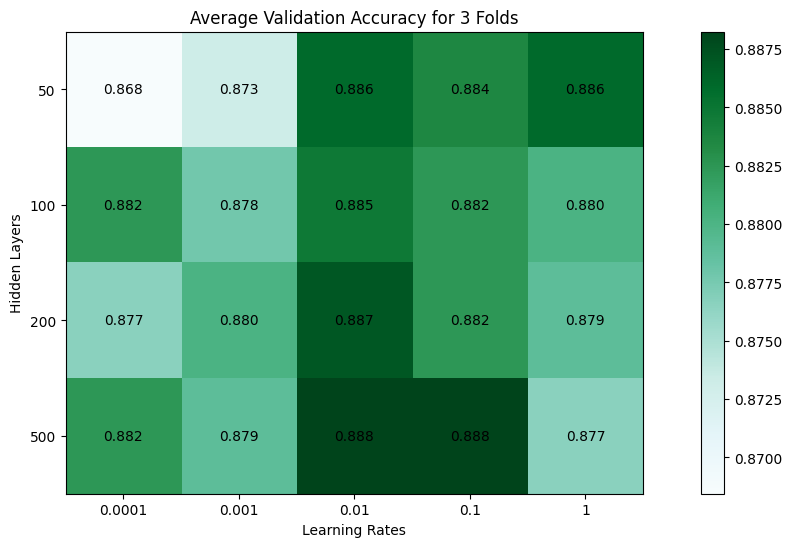

In [22]:
X = np.array(slf_df_balanced.drop(columns=['stress_level']))
y = np.array(slf_df_balanced['stress_level'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

pre_processed_X_train = scaler.transform(X_train)
pre_processed_X_test = scaler.transform(X_test)


hidden_layer_vals = [50, 100, 200, 500]
learning_rate_vals = [0.0001, 0.001, 0.01, 0.1, 1]

cross_val_scores = cross_validation_mlp(pre_processed_X_train, y_train, hidden_layer_vals, learning_rate_vals)
display(cross_val_scores)
heatmap(cross_val_scores, hidden_layer_vals, learning_rate_vals)

hidden_layer_vals = [[100], [100, 100], [100, 100, 100], [200], [200, 100], [200, 100, 100], [500], [500, 200], [500, 200, 100]]
cross_val_scores = cross_validation_mlp_2(pre_processed_X_train, y_train, hidden_layer_vals)
display(cross_val_scores)

Training Accuracy:  1.0
Testing Accuracy:  0.8790697674418605
[[286   0   0]
 [  0 287   0]
 [  0   0 286]]


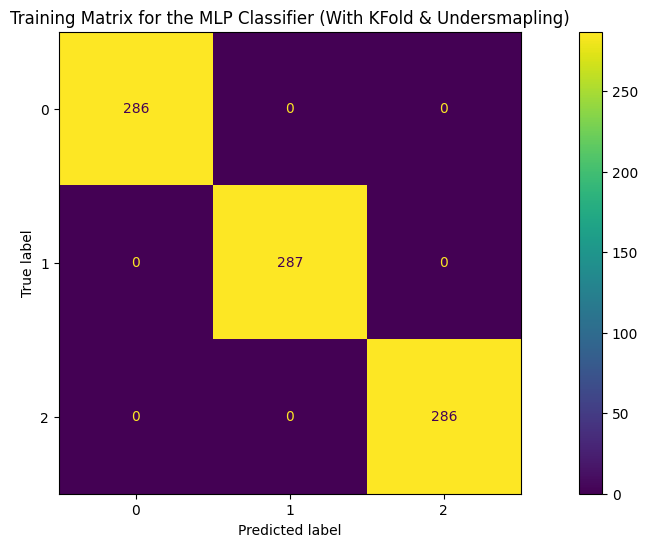

[[61  6  5]
 [ 6 63  2]
 [ 5  2 65]]


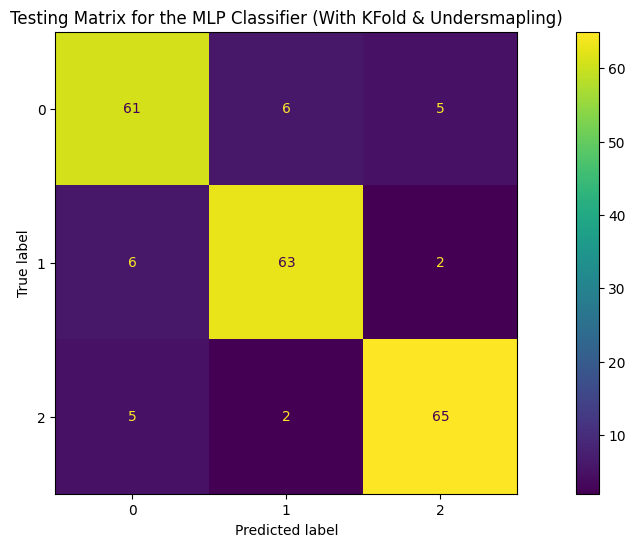

In [23]:
# Found 0.1 performs best for learning rate
# Found [100,100] for network structure is best performing 
mlp = MLPClassifier(hidden_layer_sizes=(100,100), learning_rate_init=0.1, max_iter=1000, activation='tanh', solver='sgd', random_state=42)

mlp.fit(pre_processed_X_train, y_train)
y_pred_train = mlp.predict(pre_processed_X_train)
training_acc_score = accuracy_score(y_train, y_pred_train)
print("Training Accuracy: ", training_acc_score)

y_pred_test = mlp.predict(pre_processed_X_test)
testing_acc_score = accuracy_score(y_test, y_pred_test)
print("Testing Accuracy: ", testing_acc_score)


training_cm = confusion_matrix(y_train, y_pred_train, labels=mlp.classes_)
print(training_cm)
display_training_cm = ConfusionMatrixDisplay(confusion_matrix=training_cm, display_labels=mlp.classes_)
display_training_cm.plot()
plt.title("Training Matrix for the MLP Classifier (With KFold & Undersmapling)")
plt.show()

testing_cm = confusion_matrix(y_test, y_pred_test, labels=mlp.classes_)
print(testing_cm)
display_testing_cm = ConfusionMatrixDisplay(confusion_matrix=testing_cm, display_labels=mlp.classes_)
display_testing_cm.plot()
plt.title("Testing Matrix for the MLP Classifier (With KFold & Undersmapling)")
plt.show()

In [24]:
X = slf_df.drop(columns=['stress_level'])
y = slf_df['stress_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

### Max depth tree

Decision Tree Train Accuracy: 100.0%
Decision Tree Test Accuracy: 88.0%

                         feature  importance
5                 blood_pressure    0.402118
16                social_support    0.290732
6                  sleep_quality    0.098102
19                      bullying    0.043649
7              breathing_problem    0.040255
12          academic_performance    0.021196
3                     depression    0.020850
18    extracurricular_activities    0.019703
14  teacher_student_relationship    0.015062
17                 peer_pressure    0.008769
1                    self_esteem    0.008402
8                    noise_level    0.008080
13                    study_load    0.007020
0                  anxiety_level    0.006963
10                        safety    0.003363
15        future_career_concerns    0.002327
9              living_conditions    0.001976
11                   basic_needs    0.001434
4                       headache    0.000000
2          mental_health_hi

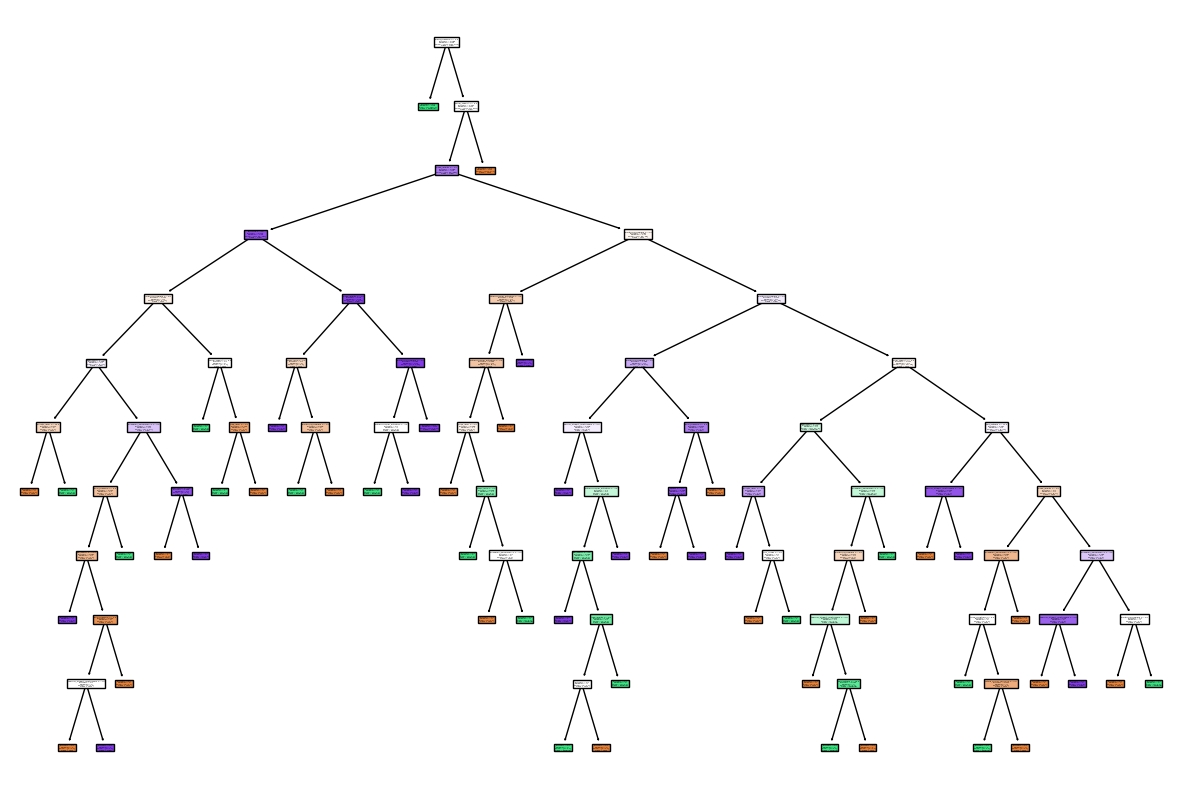

In [25]:
"""
Which factors contribute most significantly to predicting stress levels in students?
- use heatmap & correlation matrix maybe, random forest & decision trees
"""

dt = tree.DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(X_train, y_train)
y_train_pred = dt.predict(X_train)
print(f'Decision Tree Train Accuracy: {accuracy_score(y_train, y_train_pred).round(2)*100}%')

y_pred = dt.predict(X_test)
print(f'Decision Tree Test Accuracy: {accuracy_score(y_test, y_pred).round(2)*100}%')
print()

fi = dt.feature_importances_
fi_df = pd.DataFrame({'feature': list(X.columns), 'importance': fi}).sort_values('importance', ascending=False)
print(fi_df)

plt.figure(figsize=(15, 10))
tree.plot_tree(dt, filled=True, feature_names=list(X.columns), class_names=['Low', 'Medium', 'High'])
plt.show()

| Rank | Feature                      | Importance |
|------|------------------------------|------------|
| 1    | blood_pressure               | 40.21%     |
| 2    | social_support               | 29.07%     |
| 3    | sleep_quality                | 9.81%      |
| 4    | bullying                     | 4.37%      |
| 5    | breathing_problem            | 4.03%      |
| 6    | academic_performance         | 2.12%      |
| 7    | depression                   | 2.09%      |
| 8    | extracurricular_activities   | 1.97%      |
| 9    | teacher_student_relationship | 1.51%      |
| 10   | peer_pressure                | 0.88%      |
| 11   | self_esteem                  | 0.84%      |
| 12   | noise_level                  | 0.81%      |
| 13   | study_load                   | 0.70%      |
| 14   | anxiety_level                | 0.70%      |
| 15   | safety                       | 0.34%      |
| 16   | future_career_concerns       | 0.23%      |
| 17   | living_conditions            | 0.20%      |
| 18   | basic_needs                  | 0.14%      |
| 19   | headache                     | 0.00%      |
| 20   | mental_health_history        | 0.00%      |


> The max-depth decision tree is pretty good at predicting stress levels. It showed that blood pressure, sleep quality and social support were some of the best features it used to predict stress levels.

 depth  train_acc  test_acc
     2   0.879545  0.886364
     3   0.886364  0.900000
     4   0.897727  0.863636
     5   0.910227  0.877273
     6   0.925000  0.868182
     7   0.956818  0.872727
     8   0.972727  0.863636
     9   0.985227  0.881818
    10   0.994318  0.868182
    11   1.000000  0.881818
    12   1.000000  0.881818
    13   1.000000  0.881818
    14   1.000000  0.881818
    15   1.000000  0.881818
    16   1.000000  0.881818
    17   1.000000  0.881818
    18   1.000000  0.881818
    19   1.000000  0.881818
    20   1.000000  0.881818
Max test accuracy: 0.9 at depth: 3


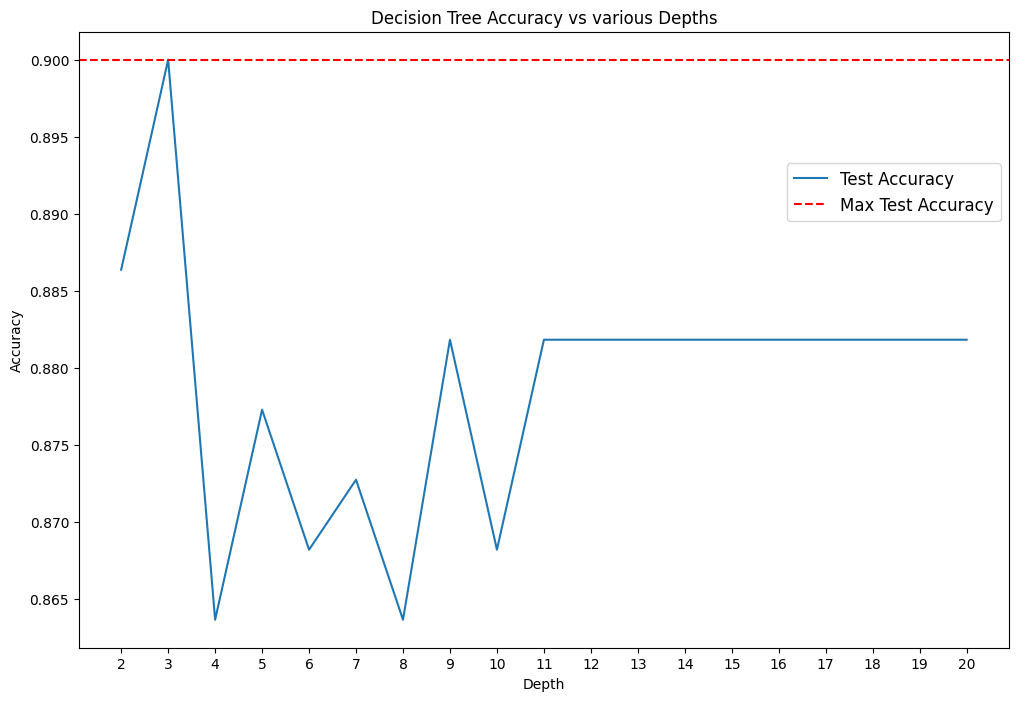

In [26]:
train_accuracies = []
test_accuracies = []
depths = []

for depth in range(2, 21):
  clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=depth, random_state=42)
  clf.fit(X_train, y_train)

  y_train_pred = clf.predict(X_train)
  train_accuracy = accuracy_score(y_train, y_train_pred)

  y_test_pred = clf.predict(X_test)
  test_accuracy = accuracy_score(y_test, y_test_pred)

  depths.append(depth)
  train_accuracies.append(train_accuracy)
  test_accuracies.append(test_accuracy)
  df = pd.DataFrame({'depth': depths, 'train_acc': train_accuracies, 'test_acc': test_accuracies})
  
print(df.to_string(index=False))
print(f'Max test accuracy: {max(test_accuracies)} at depth: {test_accuracies.index(max(test_accuracies)) + 2}')

plt.figure(figsize=(12, 8))
plt.plot(depths, test_accuracies, label='Test Accuracy')
# add horizontal line for max test accuracy
plt.axhline(max(test_accuracies), linestyle='--', color='r', label='Max Test Accuracy')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs various Depths')
plt.xticks(depths)
# offset legend to avoid overlapping with plot
plt.legend(loc='upper right', fontsize='large', bbox_to_anchor=(1, 0.8))
plt.show()


| Depth | Train Accuracy | Test Accuracy |
|-------|----------------|---------------|
| 2     | 87.95%         | 88.64%        |
| 3     | 88.64%         | 90.00%        |
| 4     | 89.77%         | 86.36%        |
| 5     | 91.02%         | 87.73%        |
| 6     | 92.50%         | 86.82%        |
| 7     | 95.68%         | 87.27%        |
| 8     | 97.27%         | 86.36%        |
| 9     | 98.52%         | 88.18%        |
| 10    | 99.43%         | 86.82%        |
| 11    | 100.00%        | 88.18%        |
| 12    | 100.00%        | 88.18%        |
| 13    | 100.00%        | 88.18%        |
| 14    | 100.00%        | 88.18%        |
| 15    | 100.00%        | 88.18%        |
| 16    | 100.00%        | 88.18%        |
| 17    | 100.00%        | 88.18%        |
| 18    | 100.00%        | 88.18%        |
| 19    | 100.00%        | 88.18%        |
| 20    | 100.00%        | 88.18%        |


### Best Decision tree with 3-depth

Decision Tree Train Accuracy: 89.0%
Decision Tree Test Accuracy: 90.0%

                         feature  importance
5                 blood_pressure    0.533560
16                social_support    0.374551
6                  sleep_quality    0.091890
0                  anxiety_level    0.000000
11                   basic_needs    0.000000
18    extracurricular_activities    0.000000
17                 peer_pressure    0.000000
15        future_career_concerns    0.000000
14  teacher_student_relationship    0.000000
13                    study_load    0.000000
12          academic_performance    0.000000
10                        safety    0.000000
1                    self_esteem    0.000000
9              living_conditions    0.000000
8                    noise_level    0.000000
7              breathing_problem    0.000000
4                       headache    0.000000
3                     depression    0.000000
2          mental_health_history    0.000000
19                      bull

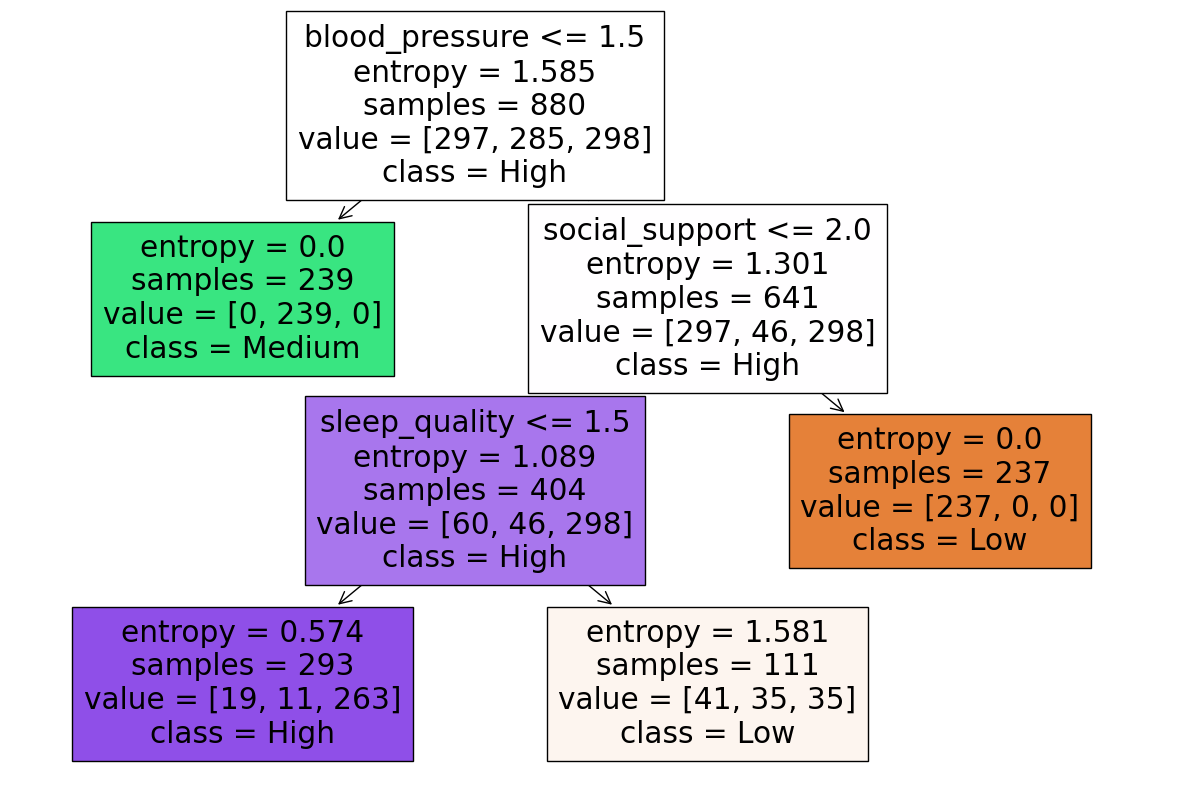

In [27]:
dt = tree.DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=3)
dt.fit(X_train, y_train)

y_train_pred = dt.predict(X_train)
print(f'Decision Tree Train Accuracy: {accuracy_score(y_train, y_train_pred).round(2)*100}%')

y_pred = dt.predict(X_test)
print(f'Decision Tree Test Accuracy: {accuracy_score(y_test, y_pred).round(2)*100}%')
print()

fi = dt.feature_importances_
fi_df = pd.DataFrame({'feature': list(X.columns), 'importance': fi}).sort_values('importance', ascending=False)
print(fi_df)

plt.figure(figsize=(15, 10))
tree.plot_tree(dt, filled=True, feature_names=list(X.columns), class_names=['Low', 'Medium', 'High'])
plt.show()

> A decision tree with max-depth of 3 seemed to provide best accuracy. We already knew that the three most impactful columns were blood pressure, sleep quality and social support from the max depth tree so depth-3 tree performing best makes sense.